# Task 2 - Prediction using Unsupervised ML
### Problem Statement - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### Author : Rachanaa M Raghuthama

## Import the necessary modules

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### Load the iris dataset 

In [56]:
iris = datasets.load_iris()
print("Dataset feature(input) names : ",iris.feature_names)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("\nThe iris dataset : \n")
iris_df.head()

Dataset feature(input) names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

The iris dataset : 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
print('The names of target(output) classes:\n',iris['target_names'])

The names of target classes:
 ['setosa' 'versicolor' 'virginica']


In [58]:
print("Size of the dataset : ",iris.data.shape)

Size of the dataset :  (150, 4)


the describe function gives the statistical information about the dataset

In [61]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



## Finding the optimum number of clusters(k)

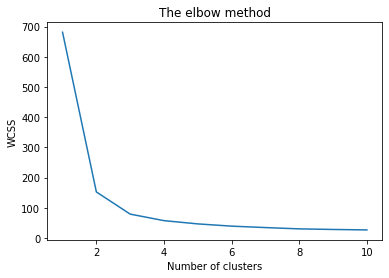

In [37]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph to find value of k
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task.

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k

n_init=10 implies that the k-means clustering algorithms is run 10 times independently with different random centroids to choose the final model as the one with the lowest SSE(Sum of Square Error). 

The max_iter parameter specifies the maximum number of iterations for each single run

Using the above method the optimal value of k can be 3

## Training the model

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters and plotting the centroids

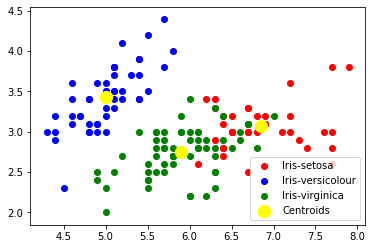

In [63]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
             c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
             c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
             c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'yellow', label = 'Centroids')

plt.legend()